In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import scipy
from scipy import ndimage

from features import rgb2gray

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
layer_name = 'MODIS_Terra_CorrectedReflectance_TrueColor'
img_extension = ".jpg"

mask_name = 'MODIS_Terra_Data_No_Data'
mask_extension = ".png"

data_dir = 'data/4326/'

labels_file = os.path.join(data_dir, layer_name + ".txt")

img_size = (8192, 4096)

def parse_labels(label_arr):
    """    
    None = Normal
    1 = missing data (expected)
    2 = missing data (unexpected)
    3 = miscoloration
    4 = edge warping
    5 = eclipse (missing data)
    6 = eclipse (only miscoloration)
    """
    label = 0
    if len(label_arr) == 0:
        label = 0
    else:
        if 1 in label_arr or 2 in label_arr or 5 in label_arr: # missing data labels!
            label = 1
        else:
            label = 0
    return label

# Check the labels file exists!
assert os.path.exists(labels_file), "Cannot find the {} file".format(layer_name + ".txt")
        
# Read in the file line by line
results_dict = {}
with open(labels_file) as f:
    file_lines = f.read().splitlines()
    num_total_img = len(file_lines)
    for line in file_lines:
        line_list = line.split()  
        split = line_list[0]
        datestring = line_list[1]
        label_arr = [int(item) for item in line_list[2:]]
        label = parse_labels(label_arr)
        
#         image = Image.open(os.path.join(data_dir, datestring, layer_name + img_extension))
#         mask_img = Image.open(os.path.join(data_dir, datestring, mask_name + mask_extension))
#         print(datestring)
        
        # Construct and resize the image
        filename = os.path.join(data_dir, datestring, layer_name + img_extension)
        image = np.asarray(Image.open(filename).resize(img_size, Image.BILINEAR))
        
        # Grayscale the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Threshold the image to black and white
        _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
        
        # Get the mask image
        mask_filename = os.path.join(data_dir, datestring, mask_name + mask_extension)
        mask_img = np.asarray(Image.open(mask_filename).resize(img_size, Image.BILINEAR))
        
        # Grayscale and threshold to black and white
        mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
        _, mask_img = cv2.threshold(mask_img, 0, 255, cv2.THRESH_BINARY_INV)
        
        result = cv2.bitwise_or(image,image,mask = mask_img)
        print("{}: {}".format(datestring, np.sum(result - mask_img)))
        results_dict[datestring] = np.sum(result - mask_img)
print(results_dict)

2003-01-01: 180
2003-01-02: 163
2003-01-03: 184
2003-01-04: 177
2003-01-05: 231
2003-01-06: 213
2003-01-07: 211
2003-01-08: 211
2003-01-09: 224
2003-01-10: 215
2003-01-11: 250
2003-01-12: 284
2003-01-13: 239
2003-01-14: 236
2003-01-15: 244
2003-01-16: 210
2003-01-17: 296
2003-01-18: 270
2003-01-19: 369
2003-01-20: 264
2003-01-21: 267
2003-01-22: 223
2003-01-23: 274
2003-01-24: 234
2003-01-25: 186
2003-01-26: 262
2003-01-27: 269
2003-01-28: 252
2003-01-29: 231
2003-01-30: 206
2003-01-31: 229
2003-02-01: 15
2003-02-02: 288
2003-02-03: 252
2003-02-04: 141
2003-02-05: 197
2003-02-06: 204
2003-02-07: 228
2003-02-08: 250
2003-02-09: 211
2003-02-10: 190
2003-02-11: 154
2003-02-12: 177
2003-02-13: 240
2003-02-14: 191
2003-02-15: 537
2003-02-16: 174
2003-02-17: 301
2003-02-18: 152
2003-02-19: 179
2003-02-20: 222
2003-02-21: 400
2003-02-22: 180
2003-02-23: 185
2003-02-24: 191
2003-02-25: 130
2003-02-26: 165
2003-02-27: 157
2003-02-28: 158
2003-03-01: 186
2003-03-02: 222
2003-03-03: 160
2003-03-0

2004-05-29: 414
2004-05-30: 467
2004-05-31: 397
2004-06-01: 693
2004-06-02: 508
2004-06-03: 593
2004-06-04: 533
2004-06-05: 362
2004-06-06: 346
2004-06-07: 367
2004-06-08: 264
2004-06-09: 272
2004-06-10: 374
2004-06-11: 720
2004-06-12: 345
2004-06-13: 439
2004-06-14: 468
2004-06-15: 364
2004-06-16: 556
2004-06-17: 401
2004-06-18: 472
2004-06-19: 694
2004-06-20: 332
2004-06-21: 406
2004-06-22: 441
2004-06-23: 469
2004-06-24: 402
2004-06-25: 689
2004-06-26: 419
2004-06-27: 563
2004-06-28: 437
2004-06-29: 451
2004-06-30: 745
2004-07-01: 479
2004-07-02: 445
2004-07-03: 376
2004-07-04: 297
2004-07-05: 344
2004-07-06: 504
2004-07-07: 511
2004-07-08: 296
2004-07-09: 547
2004-07-10: 327
2004-07-11: 342
2004-07-12: 346
2004-07-13: 447
2004-07-14: 345
2004-07-15: 355
2004-07-16: 282
2004-07-17: 386
2004-07-18: 396
2004-07-19: 393
2004-07-20: 468
2004-07-21: 615
2004-07-22: 470
2004-07-23: 394
2004-07-24: 712
2004-07-25: 507
2004-07-26: 384
2004-07-27: 449
2004-07-28: 511
2004-07-29: 613
2004-07-

2005-10-23: 227
2005-10-24: 185
2005-10-25: 171
2005-10-26: 179
2005-10-27: 188
2005-10-28: 196
2005-10-29: 136
2005-10-30: 232
2005-10-31: 233
2005-11-01: 219
2005-11-02: 190
2005-11-03: 209
2005-11-04: 204
2005-11-05: 161
2005-11-06: 235
2005-11-07: 197
2005-11-08: 266
2005-11-09: 209
2005-11-10: 264
2005-11-11: 325
2005-11-12: 224
2005-11-13: 259
2005-11-14: 277
2005-11-15: 334
2005-11-16: 211
2005-11-17: 222
2005-11-18: 234
2005-11-19: 246
2005-11-20: 297
2005-11-21: 281
2005-11-22: 215
2005-11-23: 246
2005-11-24: 189
2005-11-25: 163
2005-11-26: 244
2005-11-27: 231
2005-11-28: 238
2005-11-29: 197
2005-11-30: 225
2005-12-01: 222
2005-12-02: 222
2005-12-03: 195
2005-12-04: 192
2005-12-05: 189
2005-12-06: 290
2005-12-07: 204
2005-12-08: 245
2005-12-09: 273
2005-12-10: 215
2005-12-11: 349
2005-12-12: 225
2005-12-13: 238
2005-12-14: 262
2005-12-15: 210
2005-12-16: 247
2005-12-17: 353
2005-12-18: 319
2005-12-19: 202
2005-12-20: 238
2005-12-21: 368
2005-12-22: 205
2005-12-23: 327
2005-12-

2007-03-19: 180
2007-03-20: 221
2007-03-21: 270
2007-03-22: 163
2007-03-23: 223
2007-03-24: 204
2007-03-25: 181
2007-03-26: 240
2007-03-27: 209
2007-03-28: 216
2007-03-29: 238
2007-03-30: 174
2007-03-31: 256
2007-04-01: 248
2007-04-02: 231
2007-04-03: 287
2007-04-04: 214
2007-04-05: 226
2007-04-06: 261
2007-04-07: 270
2007-04-08: 255
2007-04-09: 210
2007-04-10: 231
2007-04-11: 265
2007-04-12: 198
2007-04-13: 244
2007-04-14: 154
2007-04-15: 223
2007-04-16: 187
2007-04-17: 238
2007-04-18: 175
2007-04-19: 226
2007-04-20: 218
2007-04-21: 170
2007-04-22: 232
2007-04-23: 223
2007-04-24: 281
2007-04-25: 224
2007-04-26: 211
2007-04-27: 203
2007-04-28: 342
2007-04-29: 329
2007-04-30: 271
2007-05-01: 207
2007-05-02: 197
2007-05-03: 258
2007-05-04: 225
2007-05-05: 358
2007-05-06: 240
2007-05-07: 228
2007-05-08: 385
2007-05-09: 224
2007-05-10: 224
2007-05-11: 246
2007-05-12: 207
2007-05-13: 324
2007-05-14: 203
2007-05-15: 286
2007-05-16: 414
2007-05-17: 370
2007-05-18: 274
2007-05-19: 354
2007-05-

2008-08-12: 249
2008-08-13: 209
2008-08-14: 303
2008-08-15: 217
2008-08-16: 285
2008-08-17: 350
2008-08-18: 198
2008-08-19: 253
2008-08-20: 253
2008-08-21: 272
2008-08-22: 307
2008-08-23: 247
2008-08-24: 236
2008-08-25: 289
2008-08-26: 249
2008-08-27: 270
2008-08-28: 225
2008-08-29: 256
2008-08-30: 296
2008-08-31: 216
2008-09-01: 243
2008-09-02: 267
2008-09-03: 234
2008-09-04: 274
2008-09-05: 292
2008-09-06: 238
2008-09-07: 226
2008-09-08: 248
2008-09-09: 175
2008-09-10: 279
2008-09-11: 219
2008-09-12: 207
2008-09-13: 308
2008-09-14: 225
2008-09-15: 215
2008-09-16: 305
2008-09-17: 197
2008-09-18: 253
2008-09-19: 185
2008-09-20: 222
2008-09-21: 211
2008-09-22: 230
2008-09-23: 186
2008-09-24: 202
2008-09-25: 184
2008-09-26: 294
2008-09-27: 189
2008-09-28: 212
2008-09-29: 183
2008-09-30: 197
2008-10-01: 225
2008-10-02: 229
2008-10-03: 214
2008-10-04: 176
2008-10-05: 168
2008-10-06: 162
2008-10-07: 169
2008-10-08: 208
2008-10-09: 181
2008-10-10: 173
2008-10-11: 162
2008-10-12: 202
2008-10-

2010-01-07: 274
2010-01-08: 201
2010-01-09: 281
2010-01-10: 265
2010-01-11: 271
2010-01-12: 243
2010-01-13: 249
2010-01-14: 257
2010-01-15: 27382
2010-01-16: 239
2010-01-17: 195
2010-01-18: 187
2010-01-19: 186
2010-01-20: 367
2010-01-21: 216
2010-01-22: 184
2010-01-23: 267
2010-01-24: 300
2010-01-25: 180
2010-01-26: 179
2010-01-27: 235
2010-01-28: 513
2010-01-29: 223
2010-01-30: 184
2010-01-31: 192
2010-02-01: 257
2010-02-02: 168
2010-02-03: 271
2010-02-04: 362
2010-02-05: 269
2010-02-06: 178
2010-02-07: 218
2010-02-08: 284
2010-02-09: 235
2010-02-10: 168
2010-02-11: 143
2010-02-12: 150
2010-02-13: 191
2010-02-14: 183
2010-02-15: 202
2010-02-16: 155
2010-02-17: 248
2010-02-18: 168
2010-02-19: 215
2010-02-20: 240
2010-02-21: 181
2010-02-22: 185
2010-02-23: 141
2010-02-24: 251
2010-02-25: 175
2010-02-26: 185
2010-02-27: 190
2010-02-28: 196
2010-03-01: 194
2010-03-02: 166
2010-03-03: 147
2010-03-04: 158
2010-03-05: 185
2010-03-06: 228
2010-03-07: 175
2010-03-08: 168
2010-03-09: 120
2010-0

2011-06-03: 353
2011-06-04: 486
2011-06-05: 530
2011-06-06: 349
2011-06-07: 374
2011-06-08: 514
2011-06-09: 317
2011-06-10: 391
2011-06-11: 851
2011-06-12: 495
2011-06-13: 470
2011-06-14: 536
2011-06-15: 314
2011-06-16: 396
2011-06-17: 474
2011-06-18: 325
2011-06-19: 319
2011-06-20: 587
2011-06-21: 372
2011-06-22: 501
2011-06-23: 534
2011-06-24: 559
2011-06-25: 259
2011-06-26: 514
2011-06-27: 521
2011-06-28: 462
2011-06-29: 312
2011-06-30: 270
2011-07-01: 320
2011-07-02: 383
2011-07-03: 552
2011-07-04: 413
2011-07-05: 407
2011-07-06: 421
2011-07-07: 592
2011-07-08: 535
2011-07-09: 549
2011-07-10: 303
2011-07-11: 433
2011-07-12: 318
2011-07-13: 299
2011-07-14: 460
2011-07-15: 278
2011-07-16: 368
2011-07-17: 474
2011-07-18: 368
2011-07-19: 212
2011-07-20: 225
2011-07-21: 401
2011-07-22: 383
2011-07-23: 161
2011-07-24: 297
2011-07-25: 303
2011-07-26: 360
2011-07-27: 523
2011-07-28: 238
2011-07-29: 261
2011-07-30: 256
2011-07-31: 376
2011-08-01: 439
2011-08-02: 314
2011-08-03: 320
2011-08-

2012-10-27: 182
2012-10-28: 349
2012-10-29: 255
2012-10-30: 238
2012-10-31: 169
2012-11-01: 171
2012-11-02: 214
2012-11-03: 198
2012-11-04: 157
2012-11-05: 218
2012-11-06: 272
2012-11-07: 216
2012-11-08: 194
2012-11-09: 246
2012-11-10: 245
2012-11-11: 217
2012-11-12: 240
2012-11-13: 6301
2012-11-14: 248
2012-11-15: 200
2012-11-16: 315
2012-11-17: 258
2012-11-18: 210
2012-11-19: 215
2012-11-20: 386
2012-11-21: 327
2012-11-22: 194
2012-11-23: 310
2012-11-24: 222
2012-11-25: 238
2012-11-26: 167
2012-11-27: 259
2012-11-28: 258
2012-11-29: 224
2012-11-30: 203
2012-12-01: 271
2012-12-02: 277
2012-12-03: 246
2012-12-04: 221
2012-12-05: 198
2012-12-06: 183
2012-12-07: 312
2012-12-08: 225
2012-12-09: 193
2012-12-10: 165
2012-12-11: 199
2012-12-12: 203
2012-12-13: 178
2012-12-14: 184
2012-12-15: 241
2012-12-16: 299
2012-12-17: 298
2012-12-18: 235
2012-12-19: 363
2012-12-20: 271
2012-12-21: 252
2012-12-22: 234
2012-12-23: 252
2012-12-24: 281
2012-12-25: 272
2012-12-26: 240
2012-12-27: 225
2012-12

2014-03-24: 224
2014-03-25: 153
2014-03-26: 179
2014-03-27: 149
2014-03-28: 165
2014-03-29: 196
2014-03-30: 162
2014-03-31: 180
2014-04-01: 163
2014-04-02: 155
2014-04-03: 195
2014-04-04: 170
2014-04-05: 182
2014-04-06: 136
2014-04-07: 220
2014-04-08: 267
2014-04-09: 209
2014-04-10: 159
2014-04-11: 195
2014-04-12: 156
2014-04-13: 220
2014-04-14: 165
2014-04-15: 211
2014-04-16: 184
2014-04-17: 228
2014-04-18: 226
2014-04-19: 361
2014-04-20: 295
2014-04-21: 398
2014-04-22: 254
2014-04-23: 305
2014-04-24: 296
2014-04-25: 269
2014-04-26: 576
2014-04-27: 180
2014-04-28: 197
2014-04-29: 639
2014-04-30: 209
2014-05-01: 296
2014-05-02: 213
2014-05-03: 173
2014-05-04: 197
2014-05-05: 258
2014-05-06: 221
2014-05-07: 232
2014-05-08: 191
2014-05-09: 380
2014-05-10: 313
2014-05-11: 309
2014-05-12: 318
2014-05-13: 460
2014-05-14: 233
2014-05-15: 263
2014-05-16: 325
2014-05-17: 299
2014-05-18: 300
2014-05-19: 299
2014-05-20: 239
2014-05-21: 292
2014-05-22: 384
2014-05-23: 523
2014-05-24: 354
2014-05-

2015-08-19: 229
2015-08-20: 198
2015-08-21: 155
2015-08-22: 159
2015-08-23: 106
2015-08-24: 173
2015-08-25: 145
2015-08-26: 181
2015-08-27: 133
2015-08-28: 206
2015-08-29: 143
2015-08-30: 104
2015-08-31: 154
2015-09-01: 127
2015-09-02: 173
2015-09-03: 152
2015-09-04: 117
2015-09-05: 130
2015-09-06: 135
2015-09-07: 139
2015-09-08: 112
2015-09-09: 135
2015-09-10: 143
2015-09-11: 142
2015-09-12: 184
2015-09-13: 1322
2015-09-14: 148
2015-09-15: 138
2015-09-16: 170
2015-09-17: 167
2015-09-18: 138
2015-09-19: 134
2015-09-20: 134
2015-09-21: 129
2015-09-22: 79
2015-09-23: 134
2015-09-24: 124
2015-09-25: 128
2015-09-26: 97
2015-09-27: 109
2015-09-28: 105
2015-09-29: 158
2015-09-30: 173
2015-10-01: 127
2015-10-02: 90
2015-10-03: 66
2015-10-04: 105
2015-10-05: 73
2015-10-06: 91
2015-10-07: 131
2015-10-08: 95
2015-10-09: 66
2015-10-10: 108
2015-10-11: 109
2015-10-12: 75
2015-10-13: 129
2015-10-14: 69
2015-10-15: 116
2015-10-16: 87
2015-10-17: 94
2015-10-18: 93
2015-10-19: 112
2015-10-20: 129
2015

2017-01-16: 155
2017-01-17: 133
2017-01-18: 114
2017-01-19: 233
2017-01-20: 252
2017-01-21: 159
2017-01-22: 128
2017-01-23: 186
2017-01-24: 424
2017-01-25: 97
2017-01-26: 209
2017-01-27: 156
2017-01-28: 167
2017-01-29: 117
2017-01-30: 179
2017-01-31: 163
2017-02-01: 347
2017-02-02: 140
2017-02-03: 118
2017-02-04: 152
2017-02-05: 191
2017-02-06: 171
2017-02-07: 119
2017-02-08: 130
2017-02-09: 121
2017-02-10: 164
2017-02-11: 136
2017-02-12: 194
2017-02-13: 101
2017-02-14: 130
2017-02-15: 139
2017-02-16: 154
2017-02-17: 102
2017-02-18: 170
2017-02-19: 166
2017-02-20: 160
2017-02-21: 165
2017-02-22: 133
2017-02-23: 100
2017-02-24: 115
2017-02-25: 129
2017-02-26: 5990
2017-02-27: 430
2017-02-28: 114
2017-03-01: 129
2017-03-02: 79
2017-03-03: 90
2017-03-04: 124
2017-03-05: 80
2017-03-06: 108
2017-03-07: 142
2017-03-08: 130
2017-03-09: 120
2017-03-10: 132
2017-03-11: 150
2017-03-12: 146
2017-03-13: 105
2017-03-14: 119
2017-03-15: 148
2017-03-16: 114
2017-03-17: 215
2017-03-18: 108
2017-03-19:

2018-06-13: 262
2018-06-14: 353
2018-06-15: 376
2018-06-16: 310
2018-06-17: 500
2018-06-18: 283
2018-06-19: 372
2018-06-20: 331
2018-06-21: 313
2018-06-22: 299
2018-06-23: 291
2018-06-24: 217
2018-06-25: 349
2018-06-26: 386
{'2003-01-01': 180, '2003-01-02': 163, '2003-01-03': 184, '2003-01-04': 177, '2003-01-05': 231, '2003-01-06': 213, '2003-01-07': 211, '2003-01-08': 211, '2003-01-09': 224, '2003-01-10': 215, '2003-01-11': 250, '2003-01-12': 284, '2003-01-13': 239, '2003-01-14': 236, '2003-01-15': 244, '2003-01-16': 210, '2003-01-17': 296, '2003-01-18': 270, '2003-01-19': 369, '2003-01-20': 264, '2003-01-21': 267, '2003-01-22': 223, '2003-01-23': 274, '2003-01-24': 234, '2003-01-25': 186, '2003-01-26': 262, '2003-01-27': 269, '2003-01-28': 252, '2003-01-29': 231, '2003-01-30': 206, '2003-01-31': 229, '2003-02-01': 15, '2003-02-02': 288, '2003-02-03': 252, '2003-02-04': 141, '2003-02-05': 197, '2003-02-06': 204, '2003-02-07': 228, '2003-02-08': 250, '2003-02-09': 211, '2003-02-10': 19

In [4]:
ordered_missing_pixels = sorted(results_dict.items(), key=lambda x:x[1])

for date, num_pixels in reversed(ordered_missing_pixels):
    print("{}: {}".format(date, num_pixels))

2017-08-18: 45122
2009-07-22: 35849
2017-08-21: 35359
2016-09-01: 27757
2010-01-15: 27382
2016-03-09: 27375
2010-07-11: 21454
2017-08-12: 18062
2017-08-19: 17403
2013-05-10: 14554
2006-09-22: 13948
2009-01-26: 11216
2012-11-13: 6301
2017-02-26: 5990
2006-03-29: 5704
2014-10-23: 5158
2013-11-03: 5005
2017-08-20: 4067
2005-10-03: 4064
2005-04-08: 3819
2008-08-01: 3635
2015-03-20: 3505
2012-05-21: 2954
2004-10-14: 2215
2011-01-04: 1958
2015-09-13: 1322
2012-05-20: 1082
2014-06-21: 1006
2010-07-19: 976
2004-07-30: 947
2010-06-14: 905
2012-07-20: 898
2009-05-30: 898
2017-07-02: 889
2014-06-29: 881
2014-06-30: 870
2009-06-17: 868
2009-07-15: 859
2011-06-11: 851
2007-08-13: 851
2009-06-21: 840
2014-06-19: 828
2008-07-07: 817
2010-06-25: 801
2006-12-15: 791
2009-07-20: 779
2012-06-18: 771
2008-05-19: 771
2010-07-03: 765
2005-08-04: 753
2004-06-30: 745
2014-06-22: 742
2008-07-12: 728
2005-07-14: 726
2010-06-13: 725
2012-06-04: 723
2015-07-05: 720
2004-06-11: 720
2003-06-12: 717
2009-07-31: 716


2015-08-01: 259
2015-06-15: 259
2013-04-09: 259
2012-11-27: 259
2011-06-25: 259
2011-04-26: 259
2010-04-11: 259
2009-04-22: 259
2009-01-14: 259
2008-12-19: 259
2006-11-30: 259
2006-03-31: 259
2005-11-13: 259
2004-12-31: 259
2004-05-23: 259
2003-06-09: 259
2018-01-30: 258
2016-05-05: 258
2014-05-05: 258
2013-08-12: 258
2012-11-28: 258
2012-11-17: 258
2012-04-08: 258
2011-08-11: 258
2011-04-08: 258
2010-04-19: 258
2010-04-15: 258
2010-03-21: 258
2009-04-19: 258
2009-03-30: 258
2008-12-17: 258
2007-09-09: 258
2007-05-03: 258
2006-06-01: 258
2006-04-12: 258
2006-01-10: 258
2005-09-08: 258
2005-04-18: 258
2004-11-25: 258
2004-09-01: 258
2004-03-20: 258
2015-07-11: 257
2015-01-20: 257
2014-02-13: 257
2013-09-13: 257
2013-01-25: 257
2012-04-26: 257
2012-02-07: 257
2010-10-27: 257
2010-02-01: 257
2010-01-14: 257
2007-11-08: 257
2007-09-14: 257
2005-08-25: 257
2005-05-05: 257
2005-04-11: 257
2004-08-28: 257
2004-08-27: 257
2004-01-14: 257
2003-12-28: 257
2016-01-26: 256
2014-08-20: 256
2012-03-

2006-04-11: 205
2006-01-18: 205
2006-01-12: 205
2005-12-22: 205
2005-04-02: 205
2005-01-28: 205
2004-12-15: 205
2004-03-04: 205
2003-10-14: 205
2003-04-01: 205
2003-03-04: 205
2018-04-22: 204
2017-08-16: 204
2017-04-22: 204
2014-01-08: 204
2013-12-04: 204
2012-01-08: 204
2011-11-11: 204
2010-12-22: 204
2009-03-02: 204
2008-03-25: 204
2007-03-24: 204
2006-11-06: 204
2006-04-06: 204
2005-12-07: 204
2005-11-04: 204
2004-11-18: 204
2004-09-13: 204
2004-03-09: 204
2003-12-02: 204
2003-11-09: 204
2003-10-21: 204
2003-02-06: 204
2018-04-11: 203
2015-05-01: 203
2013-10-06: 203
2013-08-24: 203
2013-05-15: 203
2013-05-05: 203
2013-03-19: 203
2013-02-13: 203
2012-12-12: 203
2012-11-30: 203
2011-11-22: 203
2011-09-09: 203
2011-05-01: 203
2011-01-08: 203
2010-08-17: 203
2009-10-20: 203
2009-03-18: 203
2008-12-09: 203
2008-04-10: 203
2008-01-13: 203
2008-01-12: 203
2007-11-05: 203
2007-10-06: 203
2007-09-17: 203
2007-05-14: 203
2007-04-27: 203
2006-12-20: 203
2006-09-23: 203
2006-03-16: 203
2005-02-

2015-10-10: 108
2016-02-18: 107
2016-01-06: 107
2015-02-11: 107
2014-12-16: 107
2003-12-16: 107
2016-02-14: 106
2015-11-17: 106
2015-08-23: 106
2015-03-15: 106
2017-10-18: 105
2017-03-13: 105
2016-02-03: 105
2016-01-08: 105
2015-10-04: 105
2015-09-28: 105
2015-03-19: 105
2014-11-05: 105
2014-10-19: 105
2014-03-05: 105
2006-08-23: 105
2017-10-22: 104
2015-08-30: 104
2016-11-04: 103
2016-02-10: 103
2014-03-09: 103
2017-02-17: 102
2016-12-01: 102
2015-10-22: 102
2015-01-30: 102
2014-10-21: 102
2014-09-25: 102
2017-02-13: 101
2016-10-16: 101
2015-03-08: 101
2017-02-23: 100
2014-10-06: 100
2016-09-28: 98
2015-12-28: 98
2013-10-13: 98
2017-01-25: 97
2016-10-04: 97
2015-09-26: 97
2016-04-16: 96
2015-12-14: 96
2016-03-10: 95
2016-02-28: 95
2016-01-27: 95
2015-10-08: 95
2014-11-01: 95
2017-01-02: 94
2015-10-31: 94
2015-10-17: 94
2015-01-17: 94
2015-10-18: 93
2014-11-06: 93
2014-10-02: 92
2015-10-06: 91
2015-01-22: 91
2017-03-03: 90
2015-10-02: 90
2016-03-13: 89
2016-02-06: 89
2015-12-15: 89
201

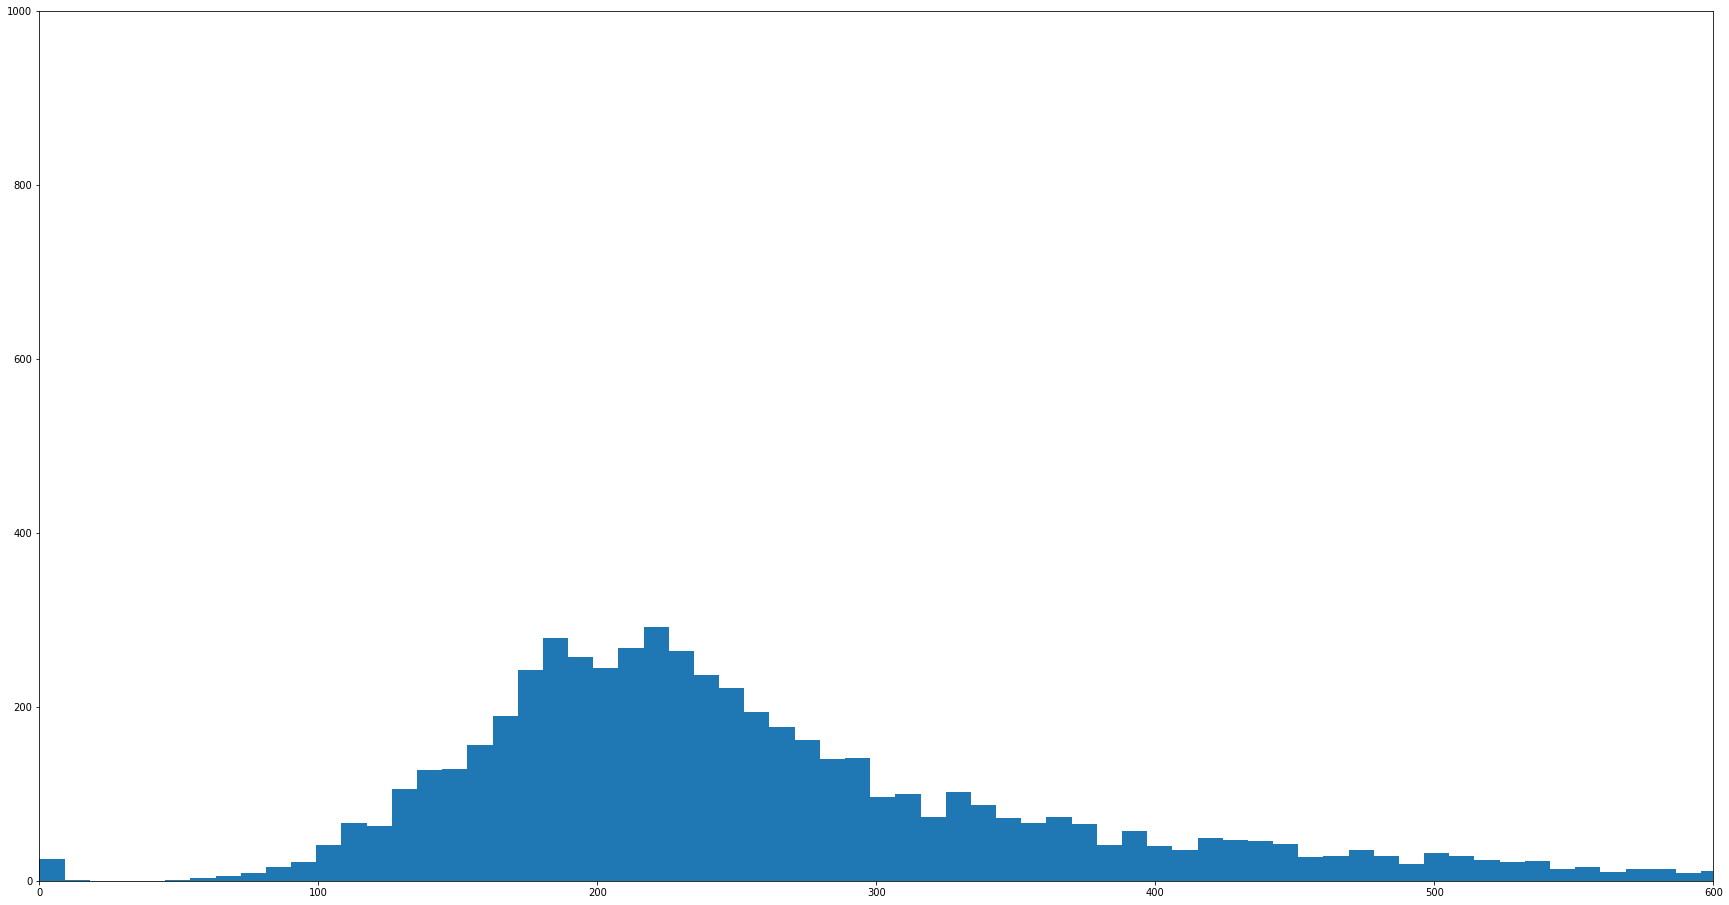

In [8]:
plt.hist(results_dict.values(), bins=5000)
# plt.xlabel('Video duration (in seconds)')
# plt.ylabel('Number of videos')
# plt.title('Distribution of Video Durations')
plt.axis([0, 600, 0, 1000])
plt.show()

In [ ]:
# gdal_translate -of GTiff -outsize 512 512 -projwin -4.21875 12.65625 -2.8125 11.25 '<GDAL_WMS><Service name="TiledWMS"><ServerUrl>https://gibs.earthdata.nasa.gov/twms/epsg4326/best/twms.cgi?</ServerUrl><TiledGroupName>VIIRS SNPP Bands M11-I2-I1 tileset</TiledGroupName><Change key="${time}">2015-11-29</Change></Service></GDAL_WMS>' VIIRS_SNPP_CorrectedReflectance_BandsM11_I2_I1_Tile_125-55.jpg

#         # Grayscale the image
#         imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#         # Threshold the image to black and white
#         _, im_thresh = cv2.threshold(imgray, 0, 255, cv2.THRESH_BINARY_INV)

#         # Copy the thresholded image
#         im_floodfill = im_thresh.copy()

#         # Fill in very small holes
#         small_kernel = np.ones((4,4),np.uint8)
#         im_floodfill = cv2.erode(im_floodfill, small_kernel, iterations = 1)

#         # Expand larger holes
#         large_kernel = np.ones((30,30),np.uint8)
#         im_floodfill = cv2.dilate(im_floodfill, large_kernel, iterations = 1)

#         # Mask used to flood filling.
#         # Notice the size needs to be 2 pixels than the image.
#         h, w = im_floodfill.shape
#         mask = np.zeros((h+2, w+2), np.uint8)

#         # Floodfill from top and bottom
#         for w_idx in range(w):
#             cv2.floodFill(im_floodfill, mask, (w_idx,0), 0);   # flood fill top
#             cv2.floodFill(im_floodfill, mask, (w_idx,h-1), 0); # flood fill bottom

#         # Count the number of holes
#         _, nr_objects = ndimage.label(im_floodfill)
#         pre_ratio_missing = 1.0 - (im_thresh == 0).sum() / im_thresh.size
#         post_ratio_missing = 1.0 - (im_floodfill == 0).sum() / im_thresh.size
#         missing_data_flag = False
#         if nr_objects == 0 and pre_ratio_missing > 0.165:
#             missing_data_flag = True
#             print("{}: Detected LARGE hole ({} missing data)".format(datestring, pre_ratio_missing))
#         if nr_objects != 0:
#             missing_data_flag = True
#             print("{}: Detected SMALL hole ({} missing data holes)".format(datestring, nr_objects))
        
#         if label == 0 and missing_data_flag: # False Positive
#             print("^^^ Algorithm INCORRECTLY detected missing data (FP)")
#         elif label == 1 and not missing_data_flag: # True Negative
#             print("{}: Algorithm MISSED the hole detection (TN).".format(datestring))